In [39]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [40]:
iris = px.data.iris()
data = iris[['sepal_length', 'sepal_width', 'petal_width', 'species']]
data_df = data[(data['species'] == 'setosa') | (data['species'] == 'versicolor')]

X = data_df[['sepal_length', 'sepal_width', 'petal_width']]
y = data_df['species']

In [41]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X, y)

w = model.coef_[0]
b = model.intercept_[0]

x_min, x_max = X['sepal_length'].min(), X['sepal_length'].max()
y_min, y_max = X['sepal_width'].min(), X['sepal_width'].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10), np.linspace(y_min, y_max, 10))

zz = (-w[0] * xx - w[1] * yy - b) / w[2]


In [42]:
fig = go.Figure()

fig.add_trace(
    go.Surface(
        x=xx,
        y=yy,
        z=zz,
        opacity=0.6,
        colorscale='Blues',
        showscale=False
    )
)

for species in data_df['species'].unique():
    species_data = data_df[data_df['species'] == species]
    fig.add_trace(
        go.Scatter3d(
            x=species_data['sepal_length'],
            y=species_data['sepal_width'],
            z=species_data['petal_width'],
            mode='markers',
            marker=dict(size=6, opacity=0.9),
            name=species
        )
    )

fig.update_layout(
    scene=dict(
        xaxis_title='sepal_length',
        yaxis_title='sepal_width',
        zaxis_title='petal_width'
    )
)

fig.show()

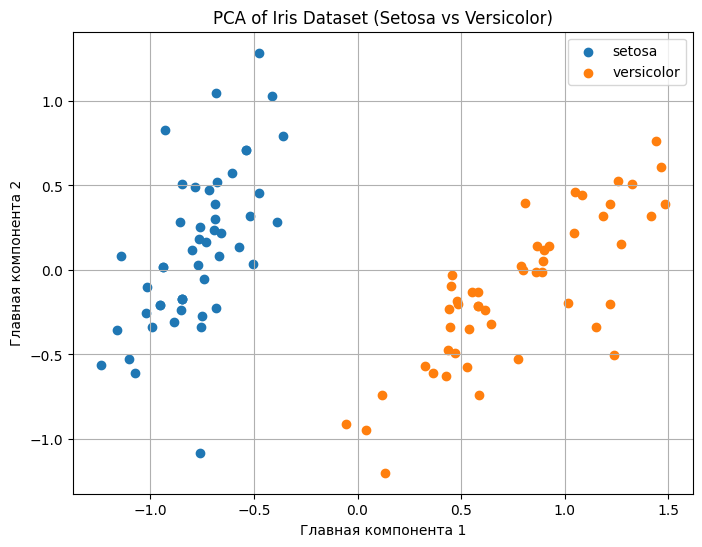

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y.reset_index(drop=True)

plt.figure(figsize=(8, 6))
for species in ['setosa', 'versicolor']:
    plt.scatter(pca_df[pca_df['species'] == species]['PC1'], pca_df[pca_df['species'] == species]['PC2'], label=species)

plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA of Iris Dataset (Setosa vs Versicolor)')
plt.legend()
plt.grid()

In [49]:
from sklearn.cluster import KMeans

X = X.copy()

model = KMeans(n_clusters=2)
model.fit(X)

X['cluster'] = model.labels_.astype(str)

fig = px.scatter_3d(
    X,
    x='sepal_length',
    y='sepal_width',
    z='petal_width',
    color='cluster'
    
)

fig.update_layout(
    scene=dict(
        xaxis_title='sepal_length',
        yaxis_title='sepal_width',
        zaxis_title='petal_width'
    )
)

fig.show()